## Imports

In [ ]:
import random
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Desafio 2 GA

## Implementação GA

In [ ]:
def generate_population(size, dimensions, boundaries):

    # Os indivíduos da população são organizados como uma lista.
    population = []
    for i in range(size):
        
        individual = []

        for d in range(0,dimensions):
          # A função random.uniform gera um número aleatório segundo uma 
          # distribuição de probabilidades uniforme entre os limites informados.
          ind = random.uniform(boundaries[d][0], boundaries[d][1])
          individual.append(ind)
        
        population.append(individual)

    return population

In [ ]:
def sort_population_by_fitness(population):
    return sorted(population, key=apply_function)

In [ ]:
def choice_by_roulette(sorted_population, fitness_sum):
    offset = 0
    normalized_fitness_sum = fitness_sum

    # Ajuste dos fitnesses com os offsets, caso existam valores de fitnesses negativos.
    lowest_fitness = apply_function(sorted_population[0])
    if lowest_fitness < 0:
        offset = -lowest_fitness
        normalized_fitness_sum += offset * len(sorted_population)

    # Giro da roleta.
    draw = random.uniform(0, 1)

    # Escolha do indivíduo.
    accumulated = 0
    for individual in sorted_population:
        fitness = apply_function(individual) + offset
        probability = fitness / normalized_fitness_sum
        accumulated += probability

        if draw <= accumulated:
            return individual

    return random.choice(sorted_population)

In [ ]:
def tournament_selection(pop, k):
  k = round(k)
  best = None
  better = None
  for i in range(k):
      ind = random.choice(pop)
      if best == None or apply_function(ind) > apply_function(best):
          best = ind
      else:
        if better == None or apply_function(ind) > apply_function(better):
          better = ind
      
      # pop.remove(ind)
      
  return better, best

In [ ]:
def crossover(individual_a, individual_b):
  
    dim = len(individual_a)

    child = []

    for d in range(dim):
      child.append(random.choice([individual_a[d],individual_b[d]]))

    return child

In [ ]:
def mutate(individual, boundaries, probability = 0.01, inc = 0.05):
    dim = len(individual)

    for d in range(dim):
      if random.random()<= probability:
        lower_boundary, upper_boundary = boundaries[d][0],boundaries[d][1]
        aux = individual[d] + random.uniform(-inc, inc)
        # Garantir que os indivíduos resultantes respeitem os limites estabelecidos para as variáveis
        individual[d]= min(max(aux, lower_boundary), upper_boundary) 

    return individual

In [ ]:
def make_next_generation(previous_population,boundaries, n_elitismo = 1):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    # fitness_sum = sum(apply_function(individual) for individual in previous_population)
  

    for i in range(population_size):
        # first_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)
        # second_choice = choice_by_roulette(sorted_by_fitness_population, fitness_sum)
        first_choice, second_choice = tournament_selection(previous_population,
                                                           len(previous_population)*0.4)

        individual = crossover(first_choice, second_choice)
        individual = mutate(individual, boundaries)
        next_generation.append(individual)

    if n_elitismo>0:
      next_generation = sort_population_by_fitness(next_generation)
      next_generation = next_generation[n_elitismo:]
      next_generation.extend(sorted_by_fitness_population[(population_size-n_elitismo):])

    return next_generation

In [ ]:
def RunGA(generations, dimensions, boundaries, positions= [], solutions = [], size=20):

  population = generate_population(size, dimensions=d, boundaries=boundaries)

  i = 1
  while True:
      if i%10==0: 
        print(f"🧬 GENERATION {i}")

      # for individual in population:
      #     print(individual, apply_function(individual))

      if i == generations:
          break

      i += 1

      population = make_next_generation(population, boundaries)

  best_individual = sort_population_by_fitness(population)[-1]
  positions.append(best_individual)
  best_solution = apply_function(best_individual)
  solutions.append(best_solution)

  print("\n🔬 FINAL RESULT")
  print(best_individual, best_solution)
  return positions, solutions

## Atividade 1

### 1.1 - Rastrigin


In [ ]:
def Rastrigin(x, A, n):
  soma = 0
  for i in range(len(x)):
    soma += (x[i]**2 - (x[i]**2 - A * np.cos(2 * np.pi * x[i])))
  f = A*n + soma
  return f

def apply_function(X):
  return -Rastrigin(X,10,10)

In [ ]:
generations = 1000
d=10
boundaries = [[-5.12,5.12]]*d
rodadas = 30

solutionsRastriginGA = []
positionsRastriginGA = []

for i in range(rodadas):
  print(f'Rodada {i+1}')
  RunGA(generations,d,boundaries, size = 20, positions = positionsRastriginGA, solutions = solutionsRastriginGA)

display(solutionsRastriginGA)

Rodada 1
🧬 GENERATION 10
🧬 GENERATION 20
🧬 GENERATION 30
🧬 GENERATION 40
🧬 GENERATION 50
🧬 GENERATION 60
🧬 GENERATION 70
🧬 GENERATION 80
🧬 GENERATION 90
🧬 GENERATION 100
🧬 GENERATION 110
🧬 GENERATION 120
🧬 GENERATION 130
🧬 GENERATION 140
🧬 GENERATION 150
🧬 GENERATION 160
🧬 GENERATION 170
🧬 GENERATION 180
🧬 GENERATION 190
🧬 GENERATION 200
🧬 GENERATION 210
🧬 GENERATION 220
🧬 GENERATION 230
🧬 GENERATION 240
🧬 GENERATION 250
🧬 GENERATION 260
🧬 GENERATION 270
🧬 GENERATION 280
🧬 GENERATION 290
🧬 GENERATION 300
🧬 GENERATION 310
🧬 GENERATION 320
🧬 GENERATION 330
🧬 GENERATION 340
🧬 GENERATION 350
🧬 GENERATION 360
🧬 GENERATION 370
🧬 GENERATION 380
🧬 GENERATION 390
🧬 GENERATION 400
🧬 GENERATION 410
🧬 GENERATION 420
🧬 GENERATION 430
🧬 GENERATION 440
🧬 GENERATION 450
🧬 GENERATION 460
🧬 GENERATION 470
🧬 GENERATION 480
🧬 GENERATION 490
🧬 GENERATION 500
🧬 GENERATION 510
🧬 GENERATION 520
🧬 GENERATION 530
🧬 GENERATION 540
🧬 GENERATION 550
🧬 GENERATION 560
🧬 GENERATION 570
🧬 GENERATION 580
🧬 GENERATION 5

[-0.0006995279161401413,
 -0.0001666915964619875,
 -0.0008449173195259618,
 -0.00017910477488669585,
 -0.00019014682621332213,
 -0.00024635856209442863,
 -8.999239771867451e-05,
 -0.0005035766803587194,
 -0.0002193408670621011,
 -0.0006630538598244584,
 -0.0008446113462241556,
 -0.0003388990293444749,
 -0.00017477582427716243,
 -0.000743674260206717,
 -0.00010957598524896639,
 -0.00014579031918060537,
 -0.0002832143542406129,
 -0.00011105943316636058,
 -0.0012519995643174298,
 -0.00031116698552580146,
 -0.0011255249767287978,
 -0.00017603140213395818,
 -0.0001400469384122971,
 -0.00019398628354849734,
 -0.00029140096326329967,
 -0.0007390249222112288,
 -17.28989627707456,
 -0.0005087992546464193,
 -0.00021463041285585405,
 -0.00011980739114392236]

In [ ]:
med = np.mean(solutionsRastriginGA)
std = np.std(solutionsRastriginGA)

print(f'O custo médio das soluções foi de {med}. \nO desvio padrão do custo foi de {std}.')

O custo médio das soluções foi de -0.5767174335840508. 
O desvio padrão do custo foi de 3.103559413226151.


{'boxes': [<matplotlib.lines.Line2D at 0x7f876a1d9780>],
 'caps': [<matplotlib.lines.Line2D at 0x7f876a1ef1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f876a1efc50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f876a1ef8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f876a1d9a90>,
  <matplotlib.lines.Line2D at 0x7f876a1d9e10>]}

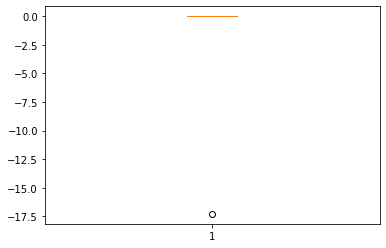

In [ ]:
plt.boxplot(solutionsRastriginGA)

In [ ]:
#Top 5 Soluções / Posições
data = {}
for i in range(10):
  var = 'x'+str(i+1)
  data[var] = [x[i] for x in positionsRastriginGA]

data['solution'] = solutionsRastriginGA

df = pd.DataFrame(data = data)
df.sort_values('solution', ascending=False).head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,solution
6,-0.500189,-2.499885,-0.499968,0.500033,-0.500297,-4.499846,-1.499526,0.500161,-3.499796,-4.499975,-0.000090
14,-3.500306,-0.499705,-0.499759,4.499902,3.500190,-4.500372,-2.500282,2.500180,4.499905,3.500104,-0.000110
17,0.500000,-1.499755,0.500116,-0.499891,-3.500301,1.500147,-1.499419,2.500135,-2.500006,-4.499908,-0.000111
29,4.499824,3.500003,-2.499601,2.500320,-2.500278,-1.500201,-3.500015,-0.500402,-0.500179,4.500059,-0.000120
22,-3.500350,-1.500182,-4.499774,-2.499309,-3.500086,-0.499905,1.500008,0.499987,-0.499928,-0.499941,-0.000140


### 1.2 - Rosenbrook

In [ ]:
def Rosenbrock(x, a, b):
  f = (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2
  return f

def apply_function(x):
  return -Rosenbrock(x,1,100)


In [ ]:
#NESTA SOLUÇÃO UTILIZOU-SE ESCOLHA POR TORNEIO

generations = 1000
d=2
boundaries = [[-30,30]]*d
rodadas = 30

solutionsRosenbrockGA = []
positionsRosenbrockGA = []

for i in range(rodadas):
  RunGA(generations,d,boundaries, size = 100, positions = positionsRosenbrockGA, solutions = solutionsRosenbrockGA)

display(solutionsRosenbrockGA)

🧬 GENERATION 10
🧬 GENERATION 20
🧬 GENERATION 30
🧬 GENERATION 40
🧬 GENERATION 50
🧬 GENERATION 60
🧬 GENERATION 70
🧬 GENERATION 80
🧬 GENERATION 90
🧬 GENERATION 100
🧬 GENERATION 110
🧬 GENERATION 120
🧬 GENERATION 130
🧬 GENERATION 140
🧬 GENERATION 150
🧬 GENERATION 160
🧬 GENERATION 170
🧬 GENERATION 180
🧬 GENERATION 190
🧬 GENERATION 200
🧬 GENERATION 210
🧬 GENERATION 220
🧬 GENERATION 230
🧬 GENERATION 240
🧬 GENERATION 250
🧬 GENERATION 260
🧬 GENERATION 270
🧬 GENERATION 280
🧬 GENERATION 290
🧬 GENERATION 300
🧬 GENERATION 310
🧬 GENERATION 320
🧬 GENERATION 330
🧬 GENERATION 340
🧬 GENERATION 350
🧬 GENERATION 360
🧬 GENERATION 370
🧬 GENERATION 380
🧬 GENERATION 390
🧬 GENERATION 400
🧬 GENERATION 410
🧬 GENERATION 420
🧬 GENERATION 430
🧬 GENERATION 440
🧬 GENERATION 450
🧬 GENERATION 460
🧬 GENERATION 470
🧬 GENERATION 480
🧬 GENERATION 490
🧬 GENERATION 500
🧬 GENERATION 510
🧬 GENERATION 520
🧬 GENERATION 530
🧬 GENERATION 540
🧬 GENERATION 550
🧬 GENERATION 560
🧬 GENERATION 570
🧬 GENERATION 580
🧬 GENERATION 590
🧬 GENE

[-15.579427421446566,
 -0.1773360732107875,
 -0.9854985840803477,
 -1.9022747390254995,
 -7.856475934701351,
 -4.347952352409931,
 -3.5163208039569365,
 -17.512083075469338,
 -2.1763610842659467,
 -0.16239912501183887,
 -2.3121285197558152,
 -35.668415347369184,
 -0.11536386288470667,
 -12.239640260851575,
 -0.785170313094718,
 -29.732267030212228,
 -10.421798208810726,
 -25.996112419277434,
 -0.1010204138138369,
 -33.29307530786879,
 -7.0736647338366865,
 -17.48677801672561,
 -0.16870759790527223,
 -17.539157543849676,
 -7.124908757447708,
 -13.902825902955446,
 -4.6199548756886655,
 -10.930954118525566,
 -7.025249122661162,
 -0.03553463151461852]

{'boxes': [<matplotlib.lines.Line2D at 0x7f8769cdf9b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8769ceb400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8769cebe80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8769cebb00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8769cdfcc0>,
  <matplotlib.lines.Line2D at 0x7f8769ceb080>]}

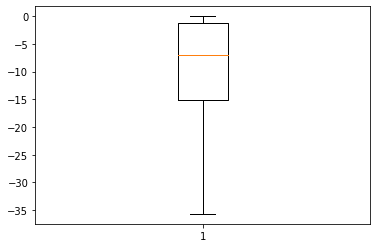

In [ ]:
plt.boxplot(solutionsRosenbrockGA)

In [ ]:
#Melhores Soluções
df = pd.DataFrame(data = {'x':[x[0] for x in positionsRosenbrockGA], 
                          'y':[x[1] for x in positionsRosenbrockGA],
                          'solution':solutionsRosenbrockGA})
df.sort_values('solution', ascending=False).head(3)

,x,y,solution
29,1.188506,1.412534,-0.035535
18,1.317837,1.736675,-0.101020
12,0.660917,0.434845,-0.115364


In [ ]:
med = np.mean(solutionsRosenbrockGA)
std = np.std(solutionsRosenbrockGA)

print(f'O custo médio das soluções foi de {med}. \nO desvio padrão do custo foi de {std}.')

O custo médio das soluções foi de -9.692961872620932. 
O desvio padrão do custo foi de 10.223755872865793.


### 1.3 - Esfera

In [ ]:
def apply_function(x):
  soma = 0
  for i in range(len(x)):
    soma+= x[i]**2
  return -soma


In [ ]:
generations = 1000
d=10
boundaries = [[-100,100]]*d
rodadas = 30

positionsEsferaGA = []
solutionsEsferaGA = []

for i in range(rodadas):
  RunGA(generations,d,boundaries, size = 100, positions = positionsEsferaGA, solutions = solutionsEsferaGA)

display(solutionsEsferaGA)
  

🧬 GENERATION 10
🧬 GENERATION 20
🧬 GENERATION 30
🧬 GENERATION 40
🧬 GENERATION 50
🧬 GENERATION 60
🧬 GENERATION 70
🧬 GENERATION 80
🧬 GENERATION 90
🧬 GENERATION 100
🧬 GENERATION 110
🧬 GENERATION 120
🧬 GENERATION 130
🧬 GENERATION 140
🧬 GENERATION 150
🧬 GENERATION 160
🧬 GENERATION 170
🧬 GENERATION 180
🧬 GENERATION 190
🧬 GENERATION 200
🧬 GENERATION 210
🧬 GENERATION 220
🧬 GENERATION 230
🧬 GENERATION 240
🧬 GENERATION 250
🧬 GENERATION 260
🧬 GENERATION 270
🧬 GENERATION 280
🧬 GENERATION 290
🧬 GENERATION 300
🧬 GENERATION 310
🧬 GENERATION 320
🧬 GENERATION 330
🧬 GENERATION 340
🧬 GENERATION 350
🧬 GENERATION 360
🧬 GENERATION 370
🧬 GENERATION 380
🧬 GENERATION 390
🧬 GENERATION 400
🧬 GENERATION 410
🧬 GENERATION 420
🧬 GENERATION 430
🧬 GENERATION 440
🧬 GENERATION 450
🧬 GENERATION 460
🧬 GENERATION 470
🧬 GENERATION 480
🧬 GENERATION 490
🧬 GENERATION 500
🧬 GENERATION 510
🧬 GENERATION 520
🧬 GENERATION 530
🧬 GENERATION 540
🧬 GENERATION 550
🧬 GENERATION 560
🧬 GENERATION 570
🧬 GENERATION 580
🧬 GENERATION 590
🧬 GENE

[-553.6283753073633,
 -311.6512013915444,
 -824.1550912031418,
 -432.34560628065896,
 -872.8825664724113,
 -200.00427140559478,
 -120.96581575595324,
 -1598.73836309742,
 -312.421939161217,
 -1148.0299034232687,
 -769.4357464335518,
 -802.319871681238,
 -453.3320350798495,
 -1726.7001549114239,
 -1224.2287921656857,
 -141.26324127998112,
 -493.9871273646106,
 -840.1946095666308,
 -2506.5875589325847,
 -1423.844427264011,
 -391.3282022079022,
 -522.3952726169575,
 -1573.5790649073865,
 -482.7707172775276,
 -1529.473463319619,
 -183.38567419371574,
 -2724.213735008632,
 -644.0258475658543,
 -124.73447315529955,
 -203.31595524547274]

In [ ]:
#Top 5 Soluções / Posições
data = {}
for i in range(10):
  var = 'x'+str(i+1)
  data[var] = [x[i] for x in positionsEsferaGA]

data['solution'] = solutionsEsferaGA

df = pd.DataFrame(data = data)
df.sort_values('solution', ascending=False).head(5)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,solution
6,1.776592,-5.914517,1.988139,-1.120456,-0.377338,4.014092,-4.028846,4.584586,-4.827094,-0.902063,-120.965816
28,-0.449017,-3.585622,0.731459,1.031345,4.018803,-2.239718,9.377099,0.591450,0.621165,0.494695,-124.734473
15,7.882515,-2.547736,2.827998,0.089502,4.174999,-6.428636,0.074120,-0.530967,-1.672813,1.670019,-141.263241
25,-0.511595,2.203904,-2.864575,-2.604405,3.912097,4.748979,-9.409713,5.052361,1.935667,-2.757693,-183.385674
5,-6.204702,-3.524702,-2.003805,-3.211121,6.461711,6.515856,-4.083852,-1.192102,-5.105436,2.526138,-200.004271


In [ ]:
med = np.mean(solutionsEsferaGA)
std = np.std(solutionsEsferaGA)

print(f'O custo médio das soluções foi de {med}. \nO desvio padrão do custo foi de {std}.')

O custo médio das soluções foi de -837.8646367892171. 
O desvio padrão do custo foi de 673.3067596364609.


{'boxes': [<matplotlib.lines.Line2D at 0x7f8769c76860>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8769c022b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8769c02d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8769c029b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8769c76b70>,
  <matplotlib.lines.Line2D at 0x7f8769c76ef0>]}

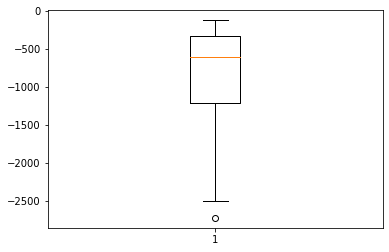

In [ ]:
plt.boxplot(solutionsEsferaGA)

## Atividade 2 - Problema da Mochila

In [ ]:
ds = np.load('/content/tcellsxldl.npy')
# ds[i][0]

In [ ]:
def CustoMochila(c,ds):
  a = c[0]
  b = c[1]
  rms_sum = 0

  for i in range(len(df)):
    y_pred = a*ds[i][0] + b
    rms = (y_pred - ds[i][1])**2
    rms_sum += rms

  return np.sqrt(rms_sum/len(df))

def apply_function(x):
  return -CustoMochila(x,ds)

In [ ]:
len(df)

442

In [ ]:
import time
generations = 200
d=2
boundaries = [[-1,1]]*d
rodadas = 30

positionsMochilaGA = []
solutionsMochilaGA = []

for i in range(rodadas):
  print('Rodada número: ',i+1)
  time1 = time.time()

  RunGA(generations=generations, dimensions=d, boundaries=boundaries,
        positions=positionsMochilaGA, solutions=solutionsMochilaGA,size=20)
  # # RunGA(gene,d,boundaries, size = 1, positions = positionsMochila, solutions = solutionsMochila)
  time2 = time.time()
  print('Iteração foi executada em ', time2-time1, ' segundos.')
display(positionsMochilaGA, solutionsMochilaGA)

Rodada número:  1
🧬 GENERATION 10
🧬 GENERATION 20
🧬 GENERATION 30
🧬 GENERATION 40
🧬 GENERATION 50
🧬 GENERATION 60
🧬 GENERATION 70
🧬 GENERATION 80
🧬 GENERATION 90
🧬 GENERATION 100
🧬 GENERATION 110
🧬 GENERATION 120
🧬 GENERATION 130
🧬 GENERATION 140
🧬 GENERATION 150
🧬 GENERATION 160
🧬 GENERATION 170
🧬 GENERATION 180
🧬 GENERATION 190
🧬 GENERATION 200

🔬 FINAL RESULT
[0.8978074783376709, -0.0004922579717073772] -0.02106357294670704
Iteração foi executada em  73.86764860153198  segundos.
Rodada número:  2
🧬 GENERATION 10
🧬 GENERATION 20
🧬 GENERATION 30
🧬 GENERATION 40
🧬 GENERATION 50
🧬 GENERATION 60
🧬 GENERATION 70
🧬 GENERATION 80
🧬 GENERATION 90
🧬 GENERATION 100
🧬 GENERATION 110
🧬 GENERATION 120
🧬 GENERATION 130
🧬 GENERATION 140
🧬 GENERATION 150
🧬 GENERATION 160
🧬 GENERATION 170
🧬 GENERATION 180
🧬 GENERATION 190
🧬 GENERATION 200

🔬 FINAL RESULT
[0.8887875165444703, -0.00018421631963246726] -0.021061886951430814
Iteração foi executada em  73.67936968803406  segundos.
Rodada número:  3
🧬 GENE

[[0.8978074783376709, -0.0004922579717073772],
 [0.8887875165444703, -0.00018421631963246726],
 [0.8469159684067187, 0.0021479849295357456],
 [0.901890094605871, -0.00433347991051531],
 [0.8956139024435192, -0.00010280809438659166],
 [0.6927939327233111, 7.753952894506283e-05],
 [0.9000568740656789, -0.00015842971812955048],
 [0.8957874277974283, 0.00022606793460452912],
 [0.8971988917722707, 0.0010850833225831413],
 [0.546281454948181, -0.0007158830871143163],
 [0.8251524676876897, -0.0012214342741036707],
 [0.8934915851643885, -0.0032552844159997665],
 [0.2554172322228785, 0.0010424664656358343],
 [0.8965863470188394, -0.00242627874813256],
 [0.3123731339991372, 0.009157075465287441],
 [0.8969613529789621, -0.001386253172008925],
 [0.8966159988568088, -0.0003240123930833491],
 [0.7787258254369487, -0.0042622339031817],
 [0.5151472065779923, 0.0033929182521471764],
 [0.8083833578111064, 0.0030497203546209356],
 [0.6693735441775301, 0.00043706311660016844],
 [0.8967079483210098, 0.0024

[-0.02106357294670704,
 -0.021061886951430814,
 -0.021298865561376293,
 -0.02150045786765004,
 -0.021058059813201253,
 -0.023183352241598617,
 -0.021058964458008363,
 -0.021059004362212214,
 -0.021085703198660422,
 -0.02686438446968597,
 -0.02136563352683509,
 -0.02130841277816183,
 -0.03707861155290885,
 -0.02119706738151906,
 -0.0360508921333575,
 -0.021103334405690326,
 -0.02106024246665121,
 -0.022205048201593705,
 -0.028004446390432345,
 -0.02168781894917363,
 -0.02367485493905777,
 -0.021195529616680572,
 -0.021078374115463844,
 -0.021079341112629997,
 -0.021066039058073867,
 -0.022749617763171737,
 -0.021062386644338595,
 -0.02105802243399955,
 -0.021569417540144662,
 -0.02146926822380413]

{'boxes': [<matplotlib.lines.Line2D at 0x7f876180a8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8761817320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761817da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8761817a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f876180abe0>,
  <matplotlib.lines.Line2D at 0x7f876180af60>]}

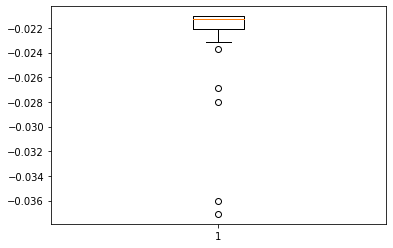

In [ ]:
plt.boxplot(solutionsMochilaGA)

In [ ]:
med = np.mean(solutionsMochilaGA)
std = np.std(solutionsMochilaGA)

print(f'O custo médio das soluções foi de {med}. \nO desvio padrão do custo foi de {std}.')

O custo médio das soluções foi de -0.022876620370140644. 
O desvio padrão do custo foi de 0.004004229195925782.


In [ ]:
#Melhores Soluções
df = pd.DataFrame(data = {'a':[x[0] for x in positionsMochilaGA], 
                          'b':[x[1] for x in positionsMochilaGA],
                          'solution':solutionsMochilaGA})

df.sort_values('solution', ascending=False).head(3)


,a,b,solution
27,0.896105,0.000104,-0.021058
4,0.895614,-0.000103,-0.021058
6,0.900057,-0.000158,-0.021059


In [ ]:
positionsMochilaGA[27]

[0.8961053186992521, 0.00010383431052755215]

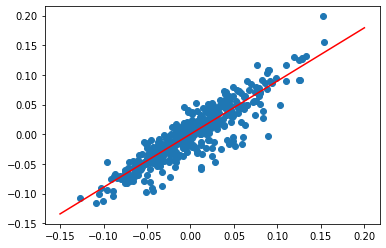

In [ ]:
df = np.load('/content/tcellsxldl.npy')
df = pd.DataFrame(df,columns = ['T', 'LDL'])

xmin, xmax = -0.15, 0.2

pos = [0.8961053186992521, 0.00010383431052755215] 

func = np.array([[xmin, pos[0]*xmin + pos[1]],
        [xmax, pos[0]*xmax + pos[1]]])

plt.scatter(np.array(df['T']),np.array(df['LDL']))
plt.plot(func[:,0], func[:,1], color='r')
plt.show()

# Desafio 2 - PSO

## Implementação PSO

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def initPosition(Np, Nd, xMin, xMax):
    R = xMin + np.random.rand(Np, Nd)*(xMax-xMin)
    return R

In [ ]:
def updatePosition(R, V, Np, Nd, xMin, xMax):
    R += V
    for particle in range(Np):
        for dimension in range(Nd):
            if R[particle][dimension] > xMax: 
                R[particle][dimension] = xMax
            if R[particle][dimension] < xMin: 
                R[particle][dimension] = xMin
    return R

In [ ]:
def initVelocity(Np, Nd, vMin, vMax):
    V = vMin + np.random.rand(Np, Nd)*(vMax-vMin)
    return V

In [ ]:
def updateVelocity(R, V, Np, Nd, w, c1, c2, vMin, vMax, chi, pBestPos, gBestPos):
    
    r1 = np.random.rand()
    r2 = np.random.rand()

    for particle in range(Np):
        V[particle, :] = chi * (w * V[particle, :] + r1*c1*(pBestPos[particle, :] - R[particle, :]) + r2*c2*(gBestPos - R[particle, :]))

        for dimension in range(Nd):
            if V[particle][dimension] > vMax: 
                V[particle][dimension] = vMax
            if V[particle][dimension] < vMin: 
                V[particle][dimension] = vMin

    return V

In [ ]:
def updateFitness(R, Np, gBestValue, gBestPos, pBestValue, pBestPos):

    for particle in range(Np):
        M = fitFunc(R[particle, :])

        if M < gBestValue:
            gBestValue = M
            gBestPos = R[particle, :]

        if M < pBestValue[particle]:
            pBestValue[particle] = M
            pBestPos[particle, :] = R[particle, :]

    return gBestValue, gBestPos, pBestValue, pBestPos

In [ ]:
def updateFitness(R, Np, gBestValue, gBestPos, pBestValue, pBestPos):

    for particle in range(Np):
        M = fitFunc(R[particle, :])

        if M < gBestValue:
            gBestValue = M
            gBestPos = R[particle, :]

        if M < pBestValue[particle]:
            pBestValue[particle] = M
            pBestPos[particle, :] = R[particle, :]

    return gBestValue, gBestPos, pBestValue, pBestPos

In [ ]:
def RunPSO(N_Particulas, N_Dimensoes, N_Iteracoes, P_Boundaries, V_Boundaries,
           c1 = 2.05, c2 = 2.05, W = ([0.4, 0.9]),
           solutions = [], positions = []):
  xMin, xMax = P_Boundaries        #Verificar quando limites forem variaveis
  vMin, vMax = V_Boundaries        #Verificar taxa
  wMin, wMax = W



  gBestValue = float("inf")
  pBestValue = [float("inf")] * Np

  pBestPos   = np.zeros((Np, Nd))
  gBestPos   = np.zeros(Nd)

  # Calcular fator de constrição de Clerck
  phi = c1+c2
  chi = 2.0/abs(2.0-phi-np.sqrt(pow(phi, 2)-4*phi))

  # Inicializar partículas e avaliar fitness
  R = initPosition(Np, Nd, xMin, xMax) #Modificar se precisar de boundaries diferentes
  V = initVelocity(Np, Nd, vMin, vMax)

  # Processo iterativo de atualizar posições, velocidades e fitnesses das partículas
  history = []

  for j in range(0, Nt):

      R = updatePosition(R, V, Np, Nd, xMin, xMax)

      gBestValue, gBestPos, pBestValue, pBestPos = updateFitness(R, Np, gBestValue, gBestPos, pBestValue, pBestPos)
      history.append(gBestValue)
      
      w = wMax - ((wMax-wMin)/Nt)*j
      V = updateVelocity(R, V, Np, Nd, w, c1, c2, vMin, vMax, chi, pBestPos, gBestPos)

  # for h in history:
  #     print(h)

  # plt.plot(history)
  # plt.title('gBest')
  # plt.show()

  solutions.append(gBestValue)
  positions.append(gBestPos)

  # print(gBestValue)
  # print(gBestPos)
  # print(R)

## Atividade 1

### 1.1 - Rastrigin

In [ ]:
def Rastrigin(x, A, n):
  soma = 0
  for i in range(len(x)):
    soma += (x[i]**2 - (x[i]**2 - A * np.cos(2 * np.pi * x[i])))
  f = A*n + soma
  return f

def fitFunc(X):
  return Rastrigin(X,10,10)

In [ ]:
# Inicializar parâmetros:
# Nt - número máximo de iterações
Np, Nd, Nt    = 50, 10, 3000
c1, c2        = 2.05, 2.05
wMin, wMax = 0.4, 0.9

P_Boundaries = [-5.14, 5.14]
V_Boundaries = [0.25*P_Boundaries[0], 0.25*P_Boundaries[1]]

rodadas = 30

solutionsRastriginPSO = []
positionsRastriginPSO = []

for i in range(rodadas):
  print('Rodada ', i+1)
  RunPSO(Np, Nd, Nt, P_Boundaries, V_Boundaries,
         solutions = solutionsRastriginPSO, positions=positionsRastriginPSO)

Rodada  1
Rodada  2
Rodada  3
Rodada  4
Rodada  5
Rodada  6
Rodada  7
Rodada  8
Rodada  9
Rodada  10
Rodada  11
Rodada  12
Rodada  13
Rodada  14
Rodada  15
Rodada  16
Rodada  17
Rodada  18
Rodada  19
Rodada  20
Rodada  21
Rodada  22
Rodada  23
Rodada  24
Rodada  25
Rodada  26
Rodada  27
Rodada  28
Rodada  29
Rodada  30


In [ ]:
med = np.mean(solutionsRastriginPSO)
std = np.std(solutionsRastriginPSO)

print(f'O custo médio das soluções foi de {med}. \nO desvio padrão do custo foi de {std}.')

O custo médio das soluções foi de 0.20164749854426608. 
O desvio padrão do custo foi de 0.16183171160880616.


{'boxes': [<matplotlib.lines.Line2D at 0x7f8761d0fa90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8761d1d4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761d1df60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8761d1dbe0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761d0fda0>,
  <matplotlib.lines.Line2D at 0x7f8761d1d160>]}

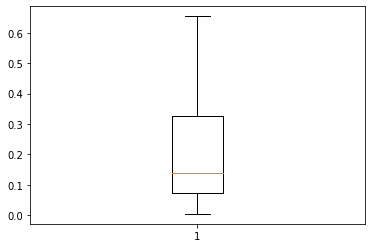

In [ ]:
plt.boxplot(solutionsRastriginPSO)

In [ ]:
#Top 5 Soluções / Posições
data = {}
for i in range(10):
  var = 'x'+str(i+1)
  data[var] = [x[i] for x in positionsRastriginPSO]

data['solution'] = solutionsRastriginPSO

df = pd.DataFrame(data = data)
df.sort_values('solution', ascending=True).head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,solution
16,0.499801,-0.499486,3.500401,1.502452,-0.497796,2.500578,-2.499077,-0.502256,-0.497741,-0.500152,0.004488
2,1.500696,-1.500169,1.502803,0.500902,-3.497867,2.495193,-1.500700,-0.498336,1.501568,-1.496575,0.010717
13,2.494573,-0.497886,4.501778,1.495039,-2.493328,1.508016,-0.507422,-0.498928,-1.499229,1.504431,0.048734
29,2.500381,3.501287,4.506071,1.491879,-4.501606,-1.506490,-1.495227,1.503242,2.492233,2.504328,0.051641
10,1.495234,-2.497636,0.501029,2.506579,1.490095,-1.506896,-1.497926,-1.505680,3.498409,0.492132,0.063016


### 1.2 - Rosenbrock

In [ ]:
def Rosenbrock(x, a, b):
  f = (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2
  return f

def fitFunc(x):
  return Rosenbrock(x,1,100)

In [ ]:
# Inicializar parâmetros:
# Nt - número máximo de iterações
Np, Nd, Nt    = 50, 2, 500
c1, c2        = 2.05, 2.05
wMin, wMax = 0.4, 0.9

P_Boundaries = [-30, 30]
V_Boundaries = [0.25*P_Boundaries[0], 0.25*P_Boundaries[1]]

positionsRosenbrockPSO = []
solutionsRosenbrockPSO = []
rodadas = 30

for i in range(rodadas):
  RunPSO(Np, Nd, Nt, P_Boundaries, V_Boundaries,
        solutions= solutionsRosenbrockPSO,positions=positionsRosenbrockPSO)

In [ ]:
#Melhores Soluções
df = pd.DataFrame(data = {'x':[x[0] for x in positionsRosenbrockPSO], 
                          'y':[x[1] for x in positionsRosenbrockPSO],
                          'solution':solutionsRosenbrockPSO})
df.sort_values('solution', ascending=False).head(5)

,x,y,solution
0,1.0,1.0,0.0
1,1.0,1.0,0.0
28,1.0,1.0,0.0
27,1.0,1.0,0.0
26,1.0,1.0,0.0


In [ ]:
med = np.mean(solutionsRosenbrockPSO)
std = np.std(solutionsRosenbrockPSO)

print(f'O custo médio das soluções foi de {med}. \nO desvio padrão do custo foi de {std}.')

O custo médio das soluções foi de 0.0. 
O desvio padrão do custo foi de 0.0.


{'boxes': [<matplotlib.lines.Line2D at 0x7f8761cc27b8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8761c4f208>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761c4fc88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8761c4f908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761cc2ac8>,
  <matplotlib.lines.Line2D at 0x7f8761cc2e48>]}

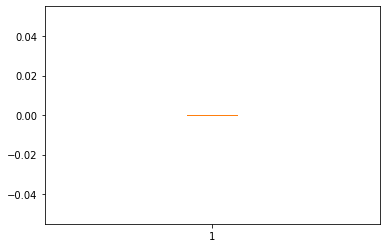

In [ ]:
plt.boxplot(solutionsRosenbrockPSO)

### 1.3 - Esfera

In [ ]:
def Esfera(x):
  soma=0
  for i in range(len(x)):
    soma += x[i]**2
  return soma

def fitFunc(x):
    return Esfera(x)

In [ ]:
# Inicializar parâmetros:
# Nt - número máximo de iterações
Np, Nd, Nt    = 50, 10, 2000
c1, c2        = 2.05, 2.05
wMin, wMax = 0.4, 0.9

P_Boundaries = [-100, 100]
V_Boundaries = [0.25*P_Boundaries[0], 0.25*P_Boundaries[1]]

rodadas=30

positionsEsferaPSO = []
soluitonsEsferaPSO = []

for i in range(rodadas):
  print('Rodada: ', i)
  RunPSO(Np, Nd, Nt, P_Boundaries, V_Boundaries,
         solutions=soluitonsEsferaPSO, positions=positionsEsferaPSO)

Rodada:  0
Rodada:  1
Rodada:  2
Rodada:  3
Rodada:  4
Rodada:  5
Rodada:  6
Rodada:  7
Rodada:  8
Rodada:  9
Rodada:  10
Rodada:  11
Rodada:  12
Rodada:  13
Rodada:  14
Rodada:  15
Rodada:  16
Rodada:  17
Rodada:  18
Rodada:  19
Rodada:  20
Rodada:  21
Rodada:  22
Rodada:  23
Rodada:  24
Rodada:  25
Rodada:  26
Rodada:  27
Rodada:  28
Rodada:  29


{'boxes': [<matplotlib.lines.Line2D at 0x7f8761c2ff98>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8761c3a9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761bc34a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8761bc3128>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761c3a2e8>,
  <matplotlib.lines.Line2D at 0x7f8761c3a668>]}

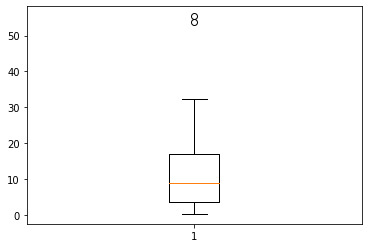

In [ ]:
plt.boxplot(soluitonsEsferaPSO)

In [ ]:
#Top 5 Soluções / Posições
data = {}
for i in range(10):
  var = 'x'+str(i+1)
  data[var] = [x[i] for x in positionsEsferaPSO]

data['solution'] = soluitonsEsferaPSO

df = pd.DataFrame(data = data)
df.sort_values('solution', ascending=True).head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,solution
13,0.055967,0.117592,-0.358659,0.182905,0.121904,-0.063302,-0.003436,-0.078155,-0.020149,-0.127155,0.220612
8,-0.238284,0.071670,-0.452549,0.074134,0.024215,0.355377,0.405457,-0.045857,-0.192253,0.206781,0.645309
26,-0.423562,0.271330,-0.307634,0.400218,-0.031488,-0.036978,-0.005868,-0.055283,0.454683,-0.212004,0.764970
19,-0.174017,0.506167,0.093993,0.912396,0.394704,0.164884,-0.050429,-0.128731,-0.348090,0.425863,1.632406
7,0.173764,0.194346,0.056927,-0.324305,-0.026861,0.114857,1.181080,0.083094,0.316684,0.307163,1.786783


## Atividade 2 - Problema da Mochila

In [ ]:
ds = np.load('/content/tcellsxldl.npy')

In [ ]:
def CustoMochila(c,ds):
  a = c[0]
  b = c[1]
  rms_sum = 0

  for i in range(len(df)):
    y_pred = a*ds[i][0] + b
    rms = (y_pred - ds[i][1])**2
    rms_sum += rms

  return np.sqrt(rms_sum/len(df))

def fitFunc(x):
  return CustoMochila(x,ds)

In [ ]:
Np, Nd, Nt    = 50, 2, 500
c1, c2        = 2.05, 2.05
wMin, wMax = 0.4, 0.9

P_Boundaries = [-10, 10]
V_Boundaries = [0.25*P_Boundaries[0], 0.25*P_Boundaries[1]]

solutionsMochilaPSO = []
positionsMochilaPSO = []
rodadas = 30

for i in range(rodadas):
  print('Rodada ', i+1)
  RunPSO(Np, Nd, Nt, P_Boundaries, V_Boundaries,
         positions=positionsMochilaPSO, solutions=solutionsMochilaPSO)

Rodada  1
Rodada  2
Rodada  3
Rodada  4
Rodada  5
Rodada  6
Rodada  7
Rodada  8
Rodada  9
Rodada  10
Rodada  11
Rodada  12
Rodada  13
Rodada  14
Rodada  15
Rodada  16
Rodada  17
Rodada  18
Rodada  19
Rodada  20
Rodada  21
Rodada  22
Rodada  23
Rodada  24
Rodada  25
Rodada  26
Rodada  27
Rodada  28
Rodada  29
Rodada  30


{'boxes': [<matplotlib.lines.Line2D at 0x7f8761baf898>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8761bbd320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761bbdda0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8761bbda20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761bafba8>,
  <matplotlib.lines.Line2D at 0x7f8761baff60>]}

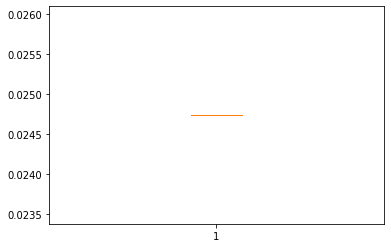

In [ ]:
plt.boxplot(solutionsMochilaPSO)

In [ ]:
med = np.mean(solutionsMochilaPSO)
std = np.std(solutionsMochilaPSO)

print(f'O custo médio das soluções foi de {med}. \nO desvio padrão do custo foi de {std}.')

O custo médio das soluções foi de 0.02473428412801985. 
O desvio padrão do custo foi de 1.0408340855860843e-17.


In [ ]:
#Melhores Soluções
df = pd.DataFrame(data = {'a':[x[0] for x in positionsMochilaPSO], 
                          'b':[x[1] for x in positionsMochilaPSO],
                          'solution':solutionsMochilaPSO})

df.sort_values('solution', ascending=True).head(5)

,a,b,solution
0,0.980526,-0.000163,0.024734
27,0.980526,-0.000163,0.024734
26,0.980526,-0.000163,0.024734
25,0.980526,-0.000163,0.024734
24,0.980526,-0.000163,0.024734


In [ ]:
#melhor Solução
positionsMochilaPSO[0]

array([ 9.80526270e-01, -1.62897629e-04])

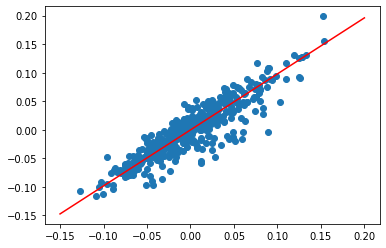

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(ds,columns = ['T', 'LDL'])

xmin, xmax = -0.15, 0.2

pos = [ 9.80526270e-01, -1.62897629e-04]

func = np.array([[xmin, pos[0]*xmin + pos[1]],
        [xmax, pos[0]*xmax + pos[1]]])

plt.scatter(np.array(df['T']),np.array(df['LDL']))
plt.plot(func[:,0], func[:,1], color='r')
plt.show()

# Comparações de BoxPlots

## Atividade 1

### 1.1 Rastrigin

{'boxes': [<matplotlib.lines.Line2D at 0x7f8761af55c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8761af5fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761b02a90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8761b02710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761af58d0>,
  <matplotlib.lines.Line2D at 0x7f8761a8b550>]}

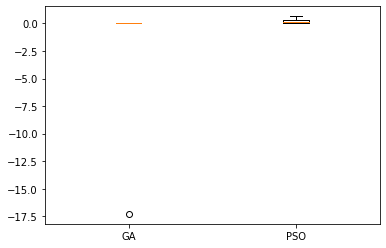

In [ ]:
plt.boxplot([solutionsRastriginGA,solutionsRastriginPSO], labels=['GA','PSO'])

### 1.2 Rosenbrock

{'boxes': [<matplotlib.lines.Line2D at 0x7f8761a70278>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8761a70c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761a7b710>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8761a7b390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761a70588>,
  <matplotlib.lines.Line2D at 0x7f8761a061d0>]}

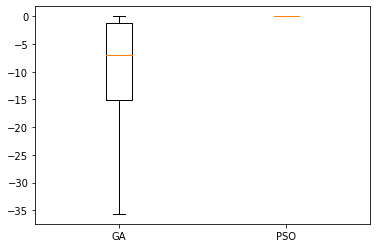

In [ ]:
plt.boxplot([solutionsRosenbrockGA,solutionsRosenbrockPSO], labels=['GA','PSO'])

### 1.3 Esfera

{'boxes': [<matplotlib.lines.Line2D at 0x7f8761927860>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87619332b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8761933d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f87619339b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761927b70>,
  <matplotlib.lines.Line2D at 0x7f876193d7f0>]}

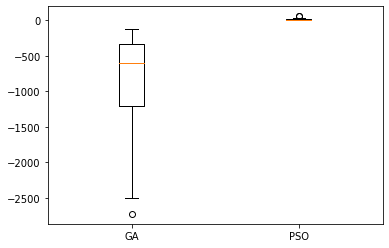

In [ ]:
plt.boxplot([solutionsEsferaGA,soluitonsEsferaPSO], labels=['GA','PSO'])

## Atividade 2 - Problema da Mochila

{'boxes': [<matplotlib.lines.Line2D at 0x7f8761894828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87618a1278>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f87618a1cf8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f87618a1978>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8761894b38>,
  <matplotlib.lines.Line2D at 0x7f87618ae7b8>]}

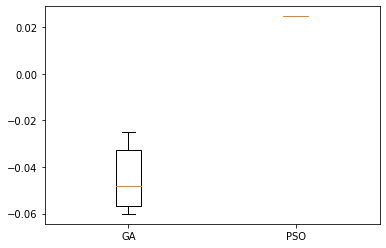

In [ ]:
plt.boxplot([solutionsMochilaGA,solutionsMochilaPSO], labels=['GA','PSO'])